## Seismic wavefield visualization and comparison
### D. Li
### 7 Feb. 2024


In [ ]:
# load modulus
import numpy as np
import seissolxdmf
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt

import seaborn as sbn


In [4]:
import matplotlib
from matplotlib.ticker import MultipleLocator
print(matplotlib.style.available)

# matplotlib.rc('font', **font)
matplotlib.style.use('seaborn-talk') # Lovely plotting style


AttributeError: module 'matplotlib' has no attribute 'style'

In [20]:
# load seissol out put data and extract station
# load GM data and compare station-to-station


def find_surf_site(stafolder, stafile, xdmfFilename,modelname):
    
    staFile = open(stafolder  + stafile ,'r')
    
    sx = seissolxdmf.seissolxdmf(xdmfFilename)
    # Number of cells
    nElements = sx.ReadNElements()
    # Read time step
    dt = sx.ReadTimeStep()
    # Read number of time steps
    ndt = sx.ReadNdt()
    # load geometry array as a numpy array of shape ((nodes, 3))
    surfxyz= sx.ReadGeometry()
    # load connectivity array as a numpy array of shape ((nElements, 3 or 4))
    # The connectivity array gives for each cell a list of vertex ids.
    connect = sx.ReadConnect()
    # horizontal comp. and vertical
    # u = sx.ReadData('v1')
    # v = sx.ReadData('v2')
    # w = sx.ReadData('v3')
    # print('(ndt,nelemenet)= ', u.shape)
    # print('time interval=', dt)
    
    sitexyz = np.loadtxt(staFile)
    # coordinates convert if necessary
    # staxyz = pyproj.transform(myproj,lla,gmData.long,gmData.lat,radians=False)

    centers = (surfxyz[connect[:,0]] + surfxyz[connect[:,1]] + surfxyz[connect[:,2]])/3.
    Receiver = np.array(sitexyz)
    
    # Receiver = Receiver.transpose()
    
    # search for nearest points of stations
    tree = spatial.KDTree(centers)
    dist, ids = tree.query(Receiver)
    
    FidReceiversnew =  stafolder + modelname + '-'+ 'site_xyz.txt'
    fout = open(FidReceiversnew,'w')
    fout1 = open(stafolder + modelname + '-'+'site_number.txt','w')
    
    for k in range(sitexyz[:,0].size):
        #newrec = find_nearest_vector(centers, rec)
        newrec = centers[ids[k]]
        print(k,ids[k])
        fout.write("%f %f %f\n" %(newrec[0],newrec[1],newrec[2]))
        fout1.write("%d %f\n" %(ids[k],dist[k]))

        # data = np.array([u[:,ids[k]],v[:,ids[k]],w[:,ids[k]]])
        # np.savetxt(stafolder + modelname + '/sta'+ str(k)+'.txt',data.transpose())
        
    fout.close()
    fout1.close()

## Ground Motion visualization
####  PGV PGA map
#### SA 1.0 0.3 3.0 sec vs. distance (km) plot

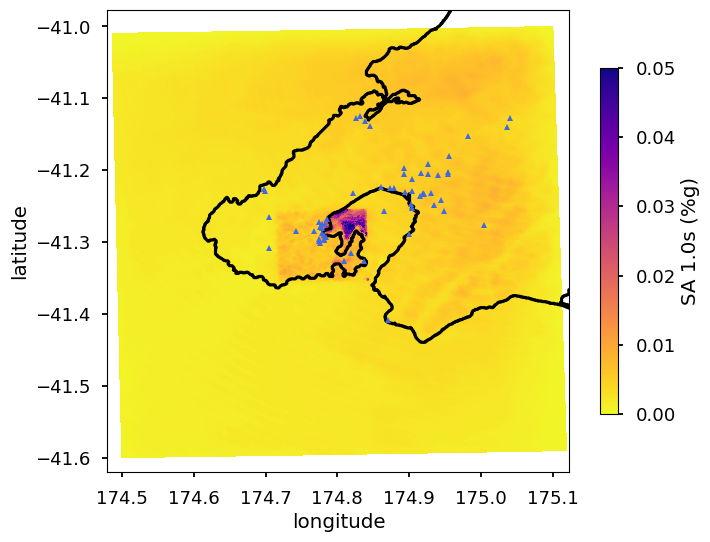

In [537]:
# print(surf[0],surf[1])
matplotlib.style.use('seaborn-v0_8-talk') # Lovely plotting style

min_lat= -41.4
min_long= 174.7
max_lat= -41.197
max_long= 174.903
ext = 0.22

fig , ax2 = plt.subplots(nrows=1,ncols=1,figsize=(8,6))

sc = ax2.tripcolor(triang,sa1/0.098,cmap='plasma_r',shading='flat',vmin = 0,vmax = 0.05)
cl = fig.colorbar(sc,ax=ax2,shrink=0.75)

ax2.plot(coast[0],coast[1],'-k',markersize=0.03)
ax2.plot(siteTable['lon'],siteTable['lat'],'^',color='royalblue',markersize=4.2)
cl.set_label('SA 1.0s (%g)')

ax2.set(xlim=( min_long-ext, max_long+ext),ylim=(min_lat-ext,max_lat+ext))
ax2.set_aspect(1)
ax2.set_xlabel('longitude')
ax2.set_ylabel('latitude')

outname = modelname + '-map-SA1.0s.png'
plt.savefig(outname, dpi=250, transparent=False)
plt.show()

In [ ]:
# print(siteTable.lon,siteTable.lat)

In [542]:
# load data
# modelname = 'mXd26psM2'
modelname = 'm2lowD15'
modelname = 'm3d15'
modelname = 'm5d36'
modelname = 'mXd26vpvs285'
xdmfFilename = '/Volumes/AvalonPark0/m20240228/' + modelname + '-GME-surface.xdmf'
# xdmfFilename = '/Volumes/AvalonPark0/model5_2hz/' + modelname + '-GME-surface.xdmf'

filecsv= '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/cat_subtable.csv'
cat_subtable= pd.read_csv(filecsv)

ieve = 3 # m2lowD15
ieve = 9 # p2024
      
# convert  # UTM projection
lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
myproj = pyproj.Proj(init='epsg:2193', datum='WGS84')
xss,yss = pyproj.transform(lla,myproj,cat_subtable["Longitude"],cat_subtable["Latitude"])

print(cat_subtable.ML[ieve],cat_subtable.PublicID[ieve])

origin = (xss[ieve],yss[ieve])

pga,pgv,sa1,sa3,sa0_3,triang,depi = load_surf_gm(xdmfFilename,origin)

dataTable = get_idensity_table(stafolder,stafile,xdmfFilename,modelname,origin)

4.7 2024p158594


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/AvalonPark0/m20240228/mXd26vpvs285-GME-surface.xdmf'

In [405]:
# event 0
obvfile = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/3145159_summary.csv' # m2
obvfile = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/3165869_summary.csv' # m3
obvfile = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/3623397_summary.csv' # m4 empty


obvfile = workfolder + '/Model_kinematic/2012p340490_summary.csv' # m5

# obvfile = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/2024p158594_summary.csv'
obvTable = pd.read_csv(obvfile, skiprows=4)

print(obvTable.keys())

Index(['Event Id', 'Origin', 'Depth', 'Mag Type', 'Magnitude', 'Network',
       'Station', 'Location', 'Latitude', 'Longitude', 'Elevation',
       'Epicentral Distance', 'PGA Vertical', 'PGA Horizontal 1',
       'PGA Horizontal 2', 'PGA Vertical.1', 'PGA Horizontal 1.1',
       'PGA Horizontal 2.1', 'PGV Vertical', 'PGV Horizontal 1',
       'PGV Horizontal 2', 'PSA 0.3 Vertical', 'PSA 0.3 Horizontal 1',
       'PSA 0.3 Horizontal 2', 'PSA 1.0 Vertical', 'PSA 1.0 Horizontal 1',
       'PSA 1.0 Horizontal 2', 'PSA 3.0 Vertical', 'PSA 3.0 Horizontal 1',
       'PSA 3.0 Horizontal 2', 'Site Name'],
      dtype='object')


In [515]:
## plot PGA vs. distance for each event/model

# import seaborn as sbn
# data = {"distance (km)": depi/1e3,"PGA (%g)": pga/0.098, "PGV (cm/s)": pgv*100,  "SA 1.0 (%g)": sa1/0.098,  "SA 2.5 (%g)": sa2_5/0.098, "SA 0.25 (%g)": sa0_25/0.098 }
# df_all = pd.DataFrame(data)
# df = pd.DataFrame(dataTable)

fig,ax = plt.subplots(1,1,figsize=(8,6))

sbn.scatterplot(data=df_all, x="distance (km)",y="PGV (cm/s)",marker = '.',size=2)
sbn.scatterplot(data=df, x="distance (km)",y="PGV (cm/s)",marker = '*')

sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PGV Vertical",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PGV Horizontal 1",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PGV Horizontal 2",marker='^')

ax.set_title('event:'+str(cat_subtable.Date[ieve]))
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)
ax.grid(which='both',linestyle=':')

ax.set(xlim=(0.1,500),ylim=(0.00001,10))
plt.savefig(modelname +"-pgv-dist.png",dpi=300)
plt.close()


In [538]:
# import seaborn as sbn
# peak spectral acceleration

data = {"distance (km)": depi/1e3,"PGA (%g)": pga/0.098, "PGV (cm/s)": pgv*100,  
        "SA 1.0 (%g)": sa1/0.098,  "SA 3.0 (%g)": sa3/0.098, "SA 0.3 (%g)": sa0_3/0.098 }
df_all = pd.DataFrame(data)
df = pd.DataFrame(dataTable)

# print(df.keys)
fig,ax = plt.subplots(1,1,figsize=(8,6))

sbn.scatterplot(data=df_all, x="distance (km)",y="SA 3.0 (%g)",marker = '.',size=2)
sbn.scatterplot(data=df, x="distance (km)",y="SA 3.0",marker = '*')

sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 3.0 Vertical",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 3.0 Horizontal 1",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 3.0 Horizontal 2",marker='^')

ax.set_title('event:'+str(cat_subtable.Date[ieve]))
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)
ax.grid(which='both',linestyle=':')

ax.set(xlim=(0.1,500),ylim=(0.00001,1))
plt.savefig(modelname +"-SA3.0s-dist.png",dpi=300)
plt.close()

In [514]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

sbn.scatterplot(data=df_all, x="distance (km)",y="SA 1.0 (%g)",marker = '.',size=2)
sbn.scatterplot(data=df, x="distance (km)",y="SA 1.0",marker = '*')

sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 1.0 Vertical",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 1.0 Horizontal 1",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 1.0 Horizontal 2",marker='^')

ax.set_title('event:'+str(cat_subtable.Date[ieve]))
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)
ax.grid(which='both',linestyle=':')

ax.set(xlim=(0.1,500),ylim=(0.00001,10))
plt.savefig(modelname +"-SA1.0s-dist.png")
plt.close()

In [517]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

sbn.scatterplot(data=df_all, x="distance (km)",y="SA 0.3 (%g)",marker = '.',size=2)
sbn.scatterplot(data=df, x="distance (km)",y="SA 3.0",marker = '*')

sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 0.3 Vertical",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 0.3 Horizontal 1",marker='^')
sbn.scatterplot(data=obvTable,x="Epicentral Distance",y="PSA 0.3 Horizontal 2",marker='^')

ax.set_title('event:'+str(cat_subtable.Date[ieve]))
ax.set_xscale('log',base=10)
ax.set_yscale('log',base=10)
ax.grid(which='both',linestyle=':')

ax.set(xlim=(0.1,500),ylim=(0.00001,10))
plt.savefig(modelname +"-SA0.3s-dist.png",dpi=300)
plt.close()

In [540]:
# load gpa and datas 
def get_idensity_table(stafolder, stafile, xdmfFilename,modelname,origin=(0,0)):

    '''create a table with  idensity data as a DataFrame'''
    
    staFile = open(stafolder  + stafile ,'r')
    
    sx = seissolxdmf.seissolxdmf(xdmfFilename)
    surfxyz= sx.ReadGeometry()
    connect = sx.ReadConnect()
    

    sitexyz = np.loadtxt(staFile)

    centers = (surfxyz[connect[:,0]] + surfxyz[connect[:,1]] + surfxyz[connect[:,2]])/3.

    Receiver = np.array(sitexyz)
        
    # search for nearest points of stations
    tree = spatial.KDTree(centers)
    dist, ids = tree.query(Receiver)
    
    depi = np.sqrt( (centers[ids,0]-origin[0])**2 + (centers[ids,1]-origin[1])**2)

    print(depi.shape)
    
    ##%%
    pga = sx.ReadData('PGA')
    pgv = sx.ReadData('PGV')
    pgd = sx.ReadData('PGD')
    sa1 = sx.ReadData('SA01.000s')
    sa3 = sx.ReadData('SA02.500s')
    # sa4 = sx.ReadData('SA00.250s')
    # sa8 = sx.ReadData('SA00.125s')
    sa0_3 = sx.ReadData('SA00.250s')

    dataTable = {"distance (km)": depi/1e3, "PGD (m)": pga[ids]/0.098, "PGV (cm/s)": pgv[ids]*100, "SA 3.0": sa3[ids]/0.098,"SA 1.0": sa1[ids]/0.098,"SA 0.3": sa0_3[ids]/0.098}
    return dataTable
    



In [41]:
## load data and plot 

# import seissolxdmf
# import pyproj
# import matplotlib.tri as tri


# coastfile ='./Geometry/CoastNorth.txt.npy'
# coast =  np.load(coastfile)
# print(coast)

def load_surf_gm(xdmfFilename,origin=(0,0)):
                 
    sx = seissolxdmf.seissolxdmf(xdmfFilename)
    
    ndt = sx.ReadNdt()
    surfxyz = sx.ReadGeometry()
    connect = sx.ReadConnect()
    
    print(surfxyz.shape,connect.shape)
    
    # convert  # UTM projection
    lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
    myproj = pyproj.Proj(init='epsg:2193', datum='WGS84')
    
    surf = pyproj.transform(myproj,lla,surfxyz[:,0],surfxyz[:,1], surfxyz[:,1], radians=False)
    
    centers = (surfxyz[connect[:,0]] + surfxyz[connect[:,1]] + surfxyz[connect[:,2]])/3.
    depi = np.sqrt( (centers[:,0]-origin[0])**2 + (centers[:,1]-origin[1])**2)
    
    # print(surf.shape)
    ############# load GMPEs data  ##############
    triang = tri.Triangulation(surf[0],surf[1],connect) # in longitude and latititude
    # triang = tri.Triangulation(surfxyz[:,0],surfxyz[:,1],connect) # in Cartesian xyz coords.
    
    ##%%
    pga = sx.ReadData('PGA')
    pgv = sx.ReadData('PGV')
    sa1 = sx.ReadData('SA01.000s')
    sa3 = sx.ReadData('SA02.500s')
    # sa4 = sx.ReadData('SA00.250s')
    # sa8 = sx.ReadData('SA00.125s')
    sa0_3 = sx.ReadData('SA00.250s')
    # sa0_2 = sx.ReadData('SA05.0000s')
    
    return pga,pgv,sa1,sa3,sa0_3, triang,depi

# print(triang)

# surf = pyproj.transform(myproj, lla,surfxyz[:,0],surfxyz[:,1], surfxyz[:,1], radians=False)
# triang = tri.Triangulation(surf[0],surf[1],connect)


## Station-to-station compariston PGA

In [49]:
# plot PGV curve vs. epicentral distance
# epi1 = np.array([ 174.75, -41.3, -1.0])

# stafolder = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/'
# staIndex  = modelname +'-site_number.txt'

# sIndex = np.loadtxt(stafolder+staIndex)
# print(sIndex[:,0])
# idx  = np.floor(sIndex[:,0])

# pga_data = {"PGA": pga[idx],"distance (km)": }

[27668. 67526. 36593. 48977. 73133. 53970. 57959. 41941. 85561. 14392.
 16371. 15444. 45594. 28350. 50796. 54376. 59626. 22562. 50809. 58032.
 85326. 61417. 62262. 66340. 64204.  7786. 29133. 42762. 10203. 44467.
 44467. 81545. 45198. 28541. 85378. 45023. 52891. 47627. 51779. 85370.
 78063. 59591. 37501. 26901. 35172. 41976. 85382. 84577. 47934. 11336.
 69586. 18191. 72862. 13939. 79448. 83495. 80251. 74440. 28303. 85430.]


In [ ]:
# Basin Edge observations

# matplotlib.style.use('seaborn-v0_8-pastel')

# # xdmffolder = '/Volumes/AvalonPark/test3dv4_5hz/'
# # modelname = 'test3Dv4-5hz'

# nsite = 43 # receivers
# duration = 30.1

# ## data around the basin

# SAMPLE_RATE = 1/0.005 # data sample rate
# N = duration * SAMPLE_RATE
# Nt = int(np.round(N/2,1)-1)
# print(N)

# from scipy.fft import fft, fftfreq


# folder = 'Model_kinematic/model2/siteRecord/'
# folder = '/Volumes/AvalonPark3/model2_2hz/lowVel/'
# modelname = 'm2low'


# for ista in range(1,61):

#     if ista < 10 :
#         filename = folder + modelname + '-receiver-0000' + str(ista) + '-00000.dat'
#     else:
#         filename = folder + modelname + '-receiver-000' + str(ista) + '-00000.dat'

    
#     t, vx, vy, vz = np.loadtxt(filename, comments='#', skiprows=2, usecols=(0,7,8,9),unpack=True)
#     yf1 = fft(vx)
#     yf2 = fft(vy)
#     yf3 = fft(vz)
#     xf = fftfreq(int(N),1/SAMPLE_RATE)
    
#     fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(6,7))
        
#     ax[0].plot((xf[1:Nt]), np.abs(yf1)[1:Nt],'-',color='seagreen',label='EW')
#     ax[0].plot((xf[1:Nt]), np.abs(yf2)[1:Nt],'-',color='royalblue',label='NS')
#     ax[0].plot((xf[1:Nt]), np.abs(yf3)[1:Nt],'-',color='tomato',label='Z')
#     ax[0].set(xlim=(0.01,100))
#     ax[0].set_xscale('log',base=10)
#     ax[0].set_yscale('log',base=10)
#     ax[0].set_title('receiver: '+ str(ista)) # index change
        
#     # plt.xlim(0,5)
#     ax[0].set_ylabel('Spectrum')
#     ax[0].set_xlabel('freq (hz)')
    
#     ax[0].legend()
    
#     ax[1].plot(t,vx,'-',color='seagreen',label='EW')
#     ax[1].plot(t,vy,'-',color='royalblue',label='NS')
#     ax[1].plot(t,vz,'-',color='tomato',label='Z')
    
#     ax[1].set(xlim=(0,30),ylim=(-0.1,0.1))
#     ax[1].set_ylabel('velocity (m/s)')
#     ax[1].set_xlabel('tims (s)')


#     # ax[1].legend()
#     outfolder = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/WelBasinRec/test3Dv2-2hz/'
#     fftname = outfolder + './Topo-WF-'+ str(sta) + '.png'  # index change
#     plt.savefig(fftname,dpi=150)


In [173]:
# load topographic data
from load_topo_data import load_topo_data

ncfile = '/Users/duoli/Documents/NSHM_SRM/Geometry/NZ_gebco_03s.grd'
# ncfile = '../Geometry/NZ_gebco_01s.grd'

topo, xrange,yrange = load_topo_data(ncfile)
print(topo.shape,xrange.shape)

(1746511.3065337986, 5426462.244420674)
(246, 246) (246,)


/Users/duoli/anaconda3/envs/py39/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/duoli/Documents/PythonPath/load_topo_data2.py:41: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xyz_map = pyproj.transform(lla, myproj, x_lon,y_lat,np.zeros(len(x_lon)), radians=False)
/Users/duoli/Documents/PythonPath/load_topo_data2.py:49: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xyz_sou = pyproj.transform(lla, myproj, lon_sou,lat_sou, radians=False) # Epicenter in UTM domain


In [176]:
from FigFunc.load_vel_csv import load_vel_csv

In [178]:
csvfile = './basin_structure/WGTN3D_v5_VsModel_density.csv'

Nx = 40
Nz = 129

grdx,grdy,grdz, grdvel,grdrho = load_vel_csv(csvfile,Nx,Nz)

print(grdvel.shape, grdy.shape,grdz.shape)
print(grdvel.min(),grdrho.min())

Index(['X', 'Y', 'Z', 'WGTN3D_v5', 'GSURFDIST', 'Vs_CALC', 'Vs_BLOCK',
       'DENSITY'],
      dtype='object')
129 215 224
(129, 40, 40) (40,) (129,)
0.0 1.0


In [42]:
# code from Sanjay; uniformly process data

def fourierspec_cal(data, dtsamp):
    ''' Gives the Fourier amplitude spectrum of a input signal.
    Parameters
    -----------------------
    data: array like
        input time signal
    dtsamp :
        sampling interval

    Returns
    freqlist: array like
        The positive signal frequencies
    fas : array like
        Positive frequency side FAS.'''
    n = len(data)
    taper = cosine_taper(n)
    sign_tap = taper*data # Tapered signal
    fft = dtsamp*fftpack.fft(sign_tap) # See the documentation of scipy.fftpack
    # Multiplication with sampling period makes it equivalent to continous Fourier transform. See Mathematica code of
    # Frank Scherbaum and fourierspec_Cal.
    freqlist = fftpack.fftfreq(n, dtsamp)
    freqs_mask = (freqlist >= 0)
    freqlist = freqlist[freqs_mask]
    fas = np.abs(fft)
    fas = fas[freqs_mask]
    return freqlist, fas

In [43]:
def sdof_response(dat, dtsamp, fosc, dampfac=0.05):
    '''This gives the single degree of freedom oscillator response for acceleration motion.

    Parameters
    --------------------
    dat: array like
    the input acceleration data without the time samples
    dtsamp: float
    the sampling interval of the time series.
    fosc: float
    The natural frequency of the SDOF oscillator at which the response is desired.
    dampfac: float
    damping of the SDOF oscillator, its optional default is the usual 0.05.

    Returns
    ----------------------
    sa: float
    the absolute spectral amplitude or the maximum of the response motion
    times: array
    the time samples for the response motion same as for the input motion
    resp : array
    the full response motion of acceleration
    '''
    # See the mathematica version in Response Spectrum and for algorithm see the book in German.
    omegaosc = 2 * np.pi * fosc
    lamda = -dampfac * omegaosc + 1j * omegaosc * np.sqrt(1 - dampfac ** 2)
    c1 = np.exp(lamda * dtsamp)
    c2 = 2 * (1 - c1) / ((lamda - np.conj(lamda)) * dtsamp)
    y0 = 2 * lamda * (-dat[0]) / (lamda - np.conj(lamda))
    deltaai = dat[1:] - dat[:-1]     # the linear approximation of acceleration between adjacent samples.
    yi = y0
    resp = np.empty(len(dat))
    resp[0] = np.real(yi)
    for i, deltaa in enumerate(deltaai, 1):
        yi = c1 * yi + c2 * deltaa
        resp[i] = np.real(yi)        # first resp is relative motion
    resp = resp + dat                # Finally I compute total absolute movement by adding resp with input acceleration
    sa = max(np.abs(resp))
    times = np.arange(0, len(dat) * dtsamp, dtsamp, dtype=float)
    return sa, times, resp

## Prepare STF in the format of SRF

In [189]:
# write source file to srf.
from FaultPlaneWrite.FaultPlaneWrite import * 

rootfolder = '/Users/duoli/Documents/NSHM_SRM/'

srffile =  rootfolder + 'p20240228.srf'
fault1 = FaultPlane()
fault1.init_from_srf(srffile)

# write source file for event 

sourcefile = '/Users/duoli/Documents/NSHM_SRM/Model_kinematic/cat_subtable_redat_reupdated.csv'
seisTable = pd.read_csv(sourcefile)
print(seisTable.keys())

print(fault1.lon.shape)

ieve = 5
isource = ieve * 2 -1 

fault_out = FaultPlane()
fault_out.strike = np.array([[ seisTable.Strike[isource] ]])
fault_out.dip = np.array([[seisTable.Dip[isource] ]])
fault_out.rake = np.array([[seisTable.Rake[isource] ]])
fault_out.PSarea_cm2= np.array([[seisTable["Area_km^2"][isource] * 1e11 ]])
fault_out.lat = np.array([[ seisTable.Lat[isource]]])
fault_out.lon= np.array([[ seisTable.Lon[isource] ]])
fault_out.slip1 =np.array([[  seisTable.Slip_cm[isource] ]])
fault_out.depth =np.array([[ seisTable.Dep[isource] ]])
fault_out.aSR = fault1.aSR
fault_out.ndt = 151
fault_out.t0 = np.array([[0.0]])
fault_out.dt = 0.01
fault_out.nx = 1
fault_out.ny = 1

print(fault_out.lon.shape, fault_out.strike)

fault_out.write_srf(seisTable.PublicID[isource] + '_format.srf')


Index(['PublicID', 'Lon', 'Lat', 'Dep', 'Slip_cm', 'Strike', 'Dip', 'Rake',
       'Area_km^2'],
      dtype='object')
(1, 1)
(1, 1) [[14.]]
done writing 2016p465888_format.srf


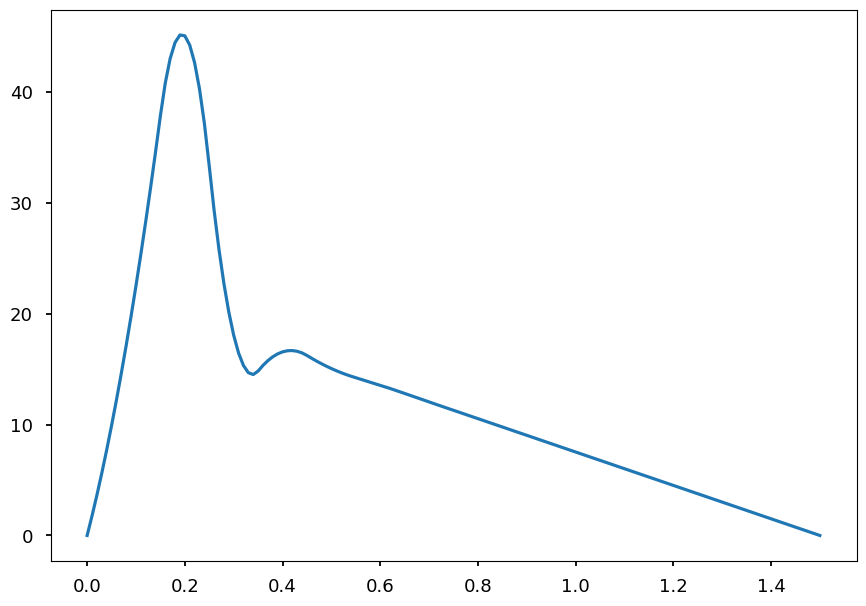

In [61]:
#plot STF
import seaborn as sbs

time = np.linspace(0,1.5,num=fault.ndt)

plt.figure()
plt.plot(time,fault.aSR[0,0,:],'-')
plt.savefig('STF_srf.png')
plt.show()

In [43]:
?np.linspace?

In [ ]:
fault.aSR[0,0,:]

In [292]:
vs = 4.0e3
rho = 2.67e3
mu =  vs**2 * rho

# mu = 3e10
slp = 0.08
area = 1.12e6

m0 = mu*slp*area

print("%5.3e"%mu, "%5.3e"%m0)

4.272e+10 3.828e+15
